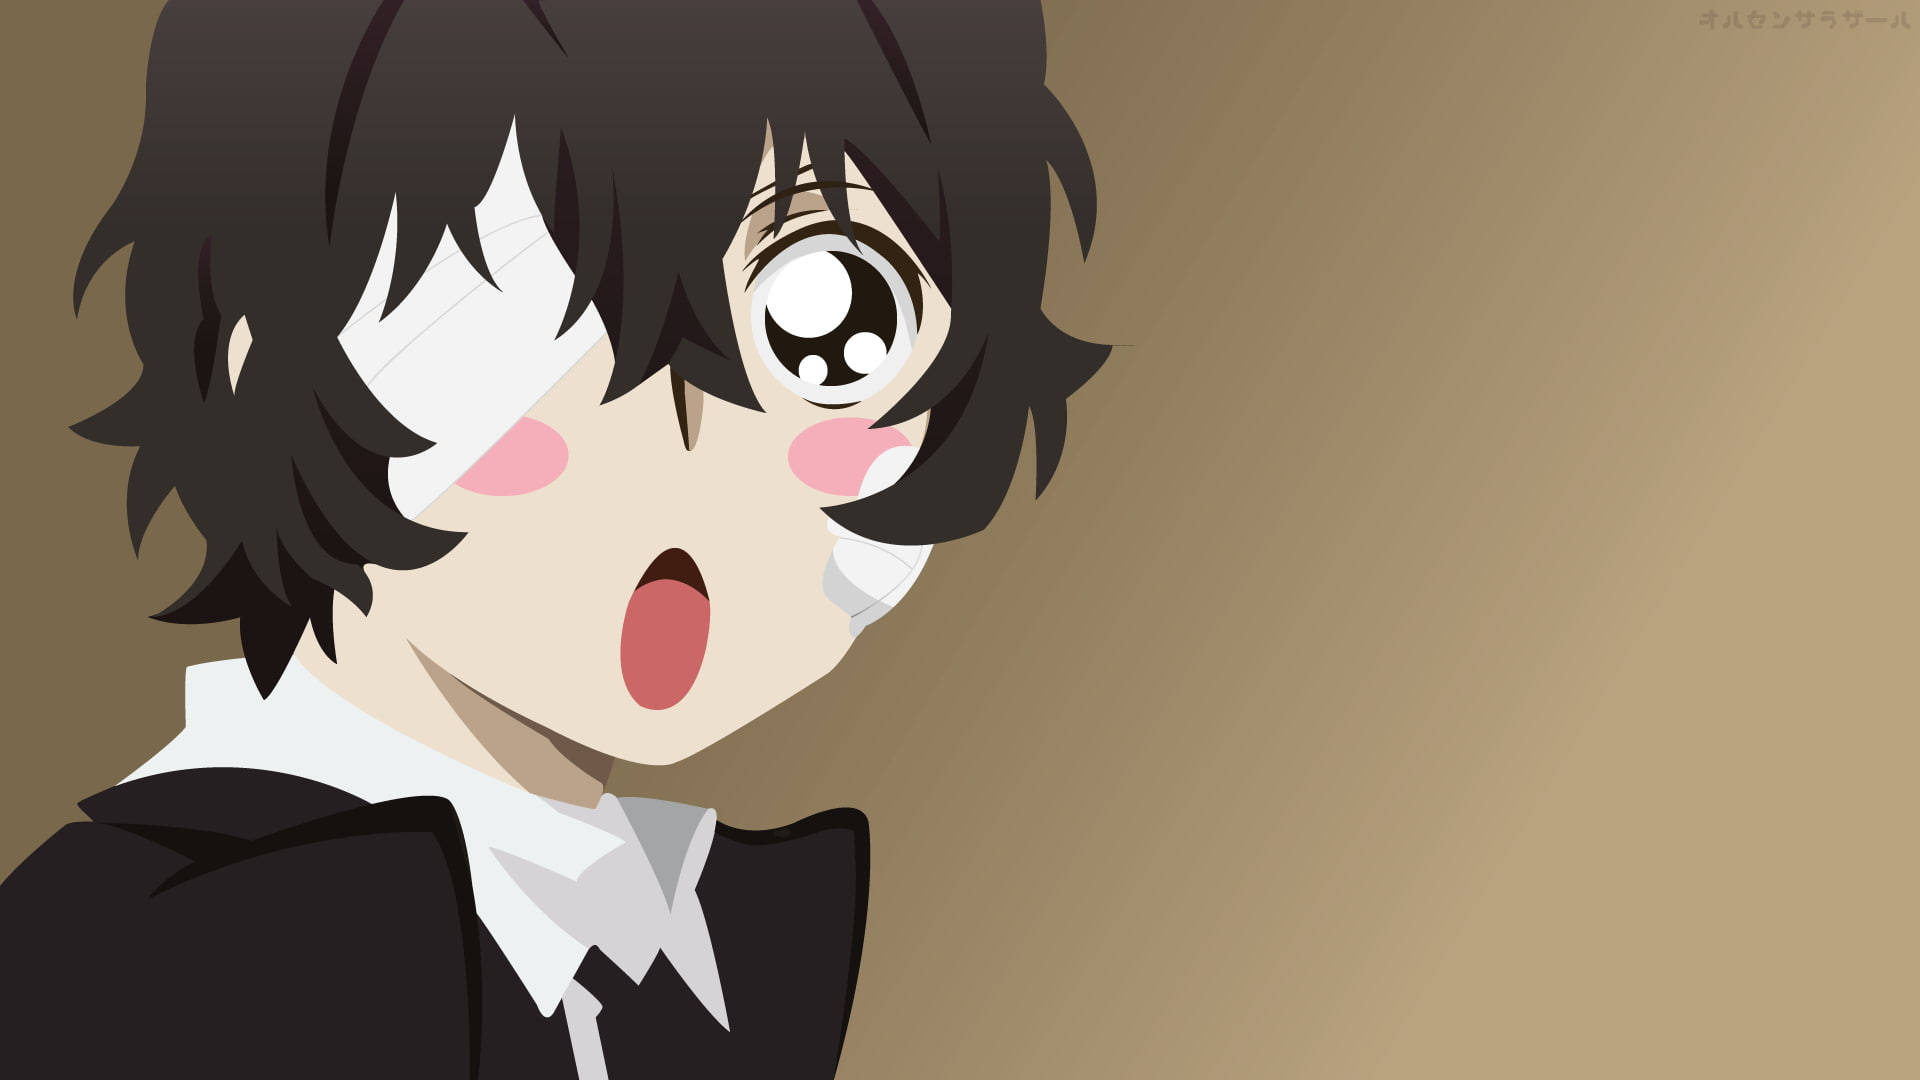

[[[121 104  76]
  [121 104  76]
  [121 104  76]
  ...
  [179 156 122]
  [179 156 122]
  [179 156 122]]

 [[121 104  76]
  [121 104  76]
  [121 104  76]
  ...
  [179 156 122]
  [179 156 122]
  [179 156 122]]

 [[121 104  76]
  [121 104  76]
  [121 104  76]
  ...
  [179 156 122]
  [179 156 122]
  [179 156 122]]

 ...

 [[ 37  31  33]
  [ 37  31  33]
  [ 37  31  33]
  ...
  [186 164 127]
  [186 164 127]
  [186 164 127]]

 [[ 37  31  33]
  [ 37  31  33]
  [ 37  31  33]
  ...
  [186 164 127]
  [186 164 127]
  [186 164 127]]

 [[ 37  31  33]
  [ 37  31  33]
  [ 37  31  33]
  ...
  [186 164 127]
  [186 164 127]
  [186 164 127]]]


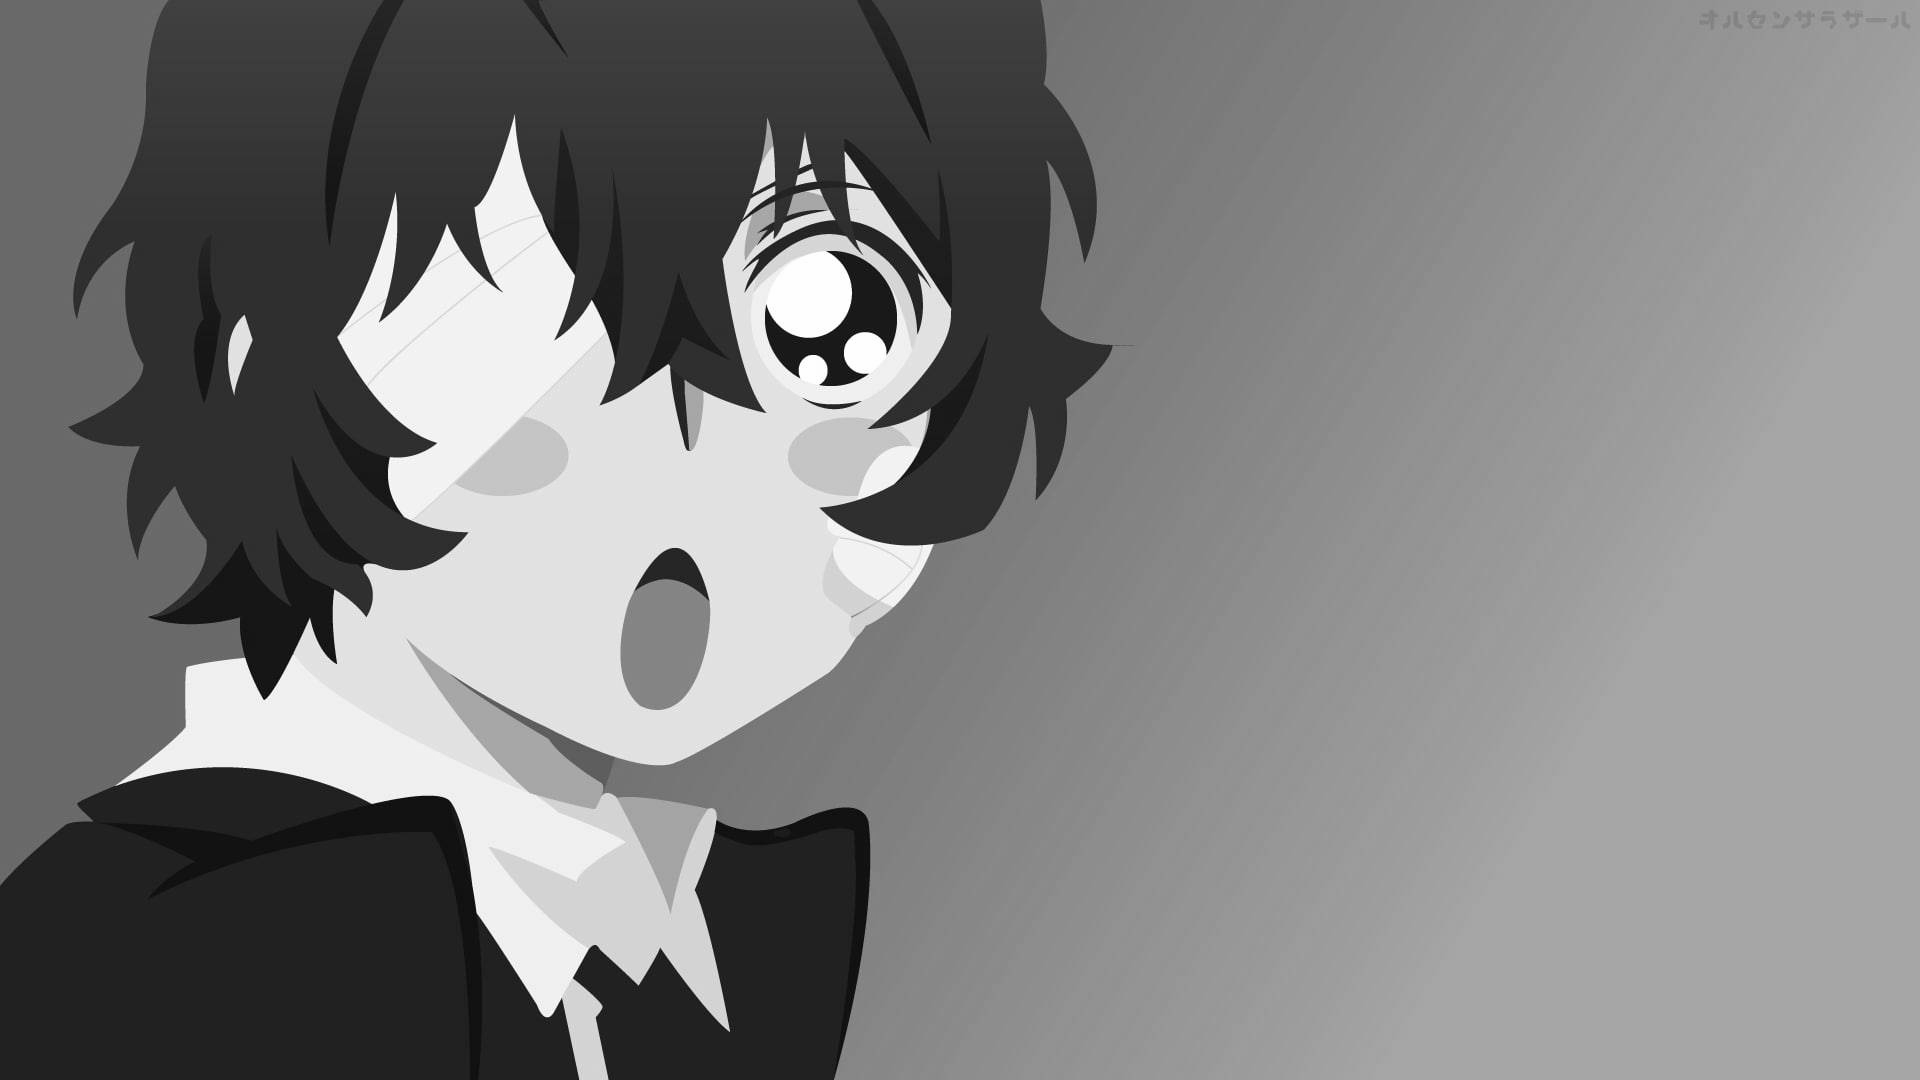

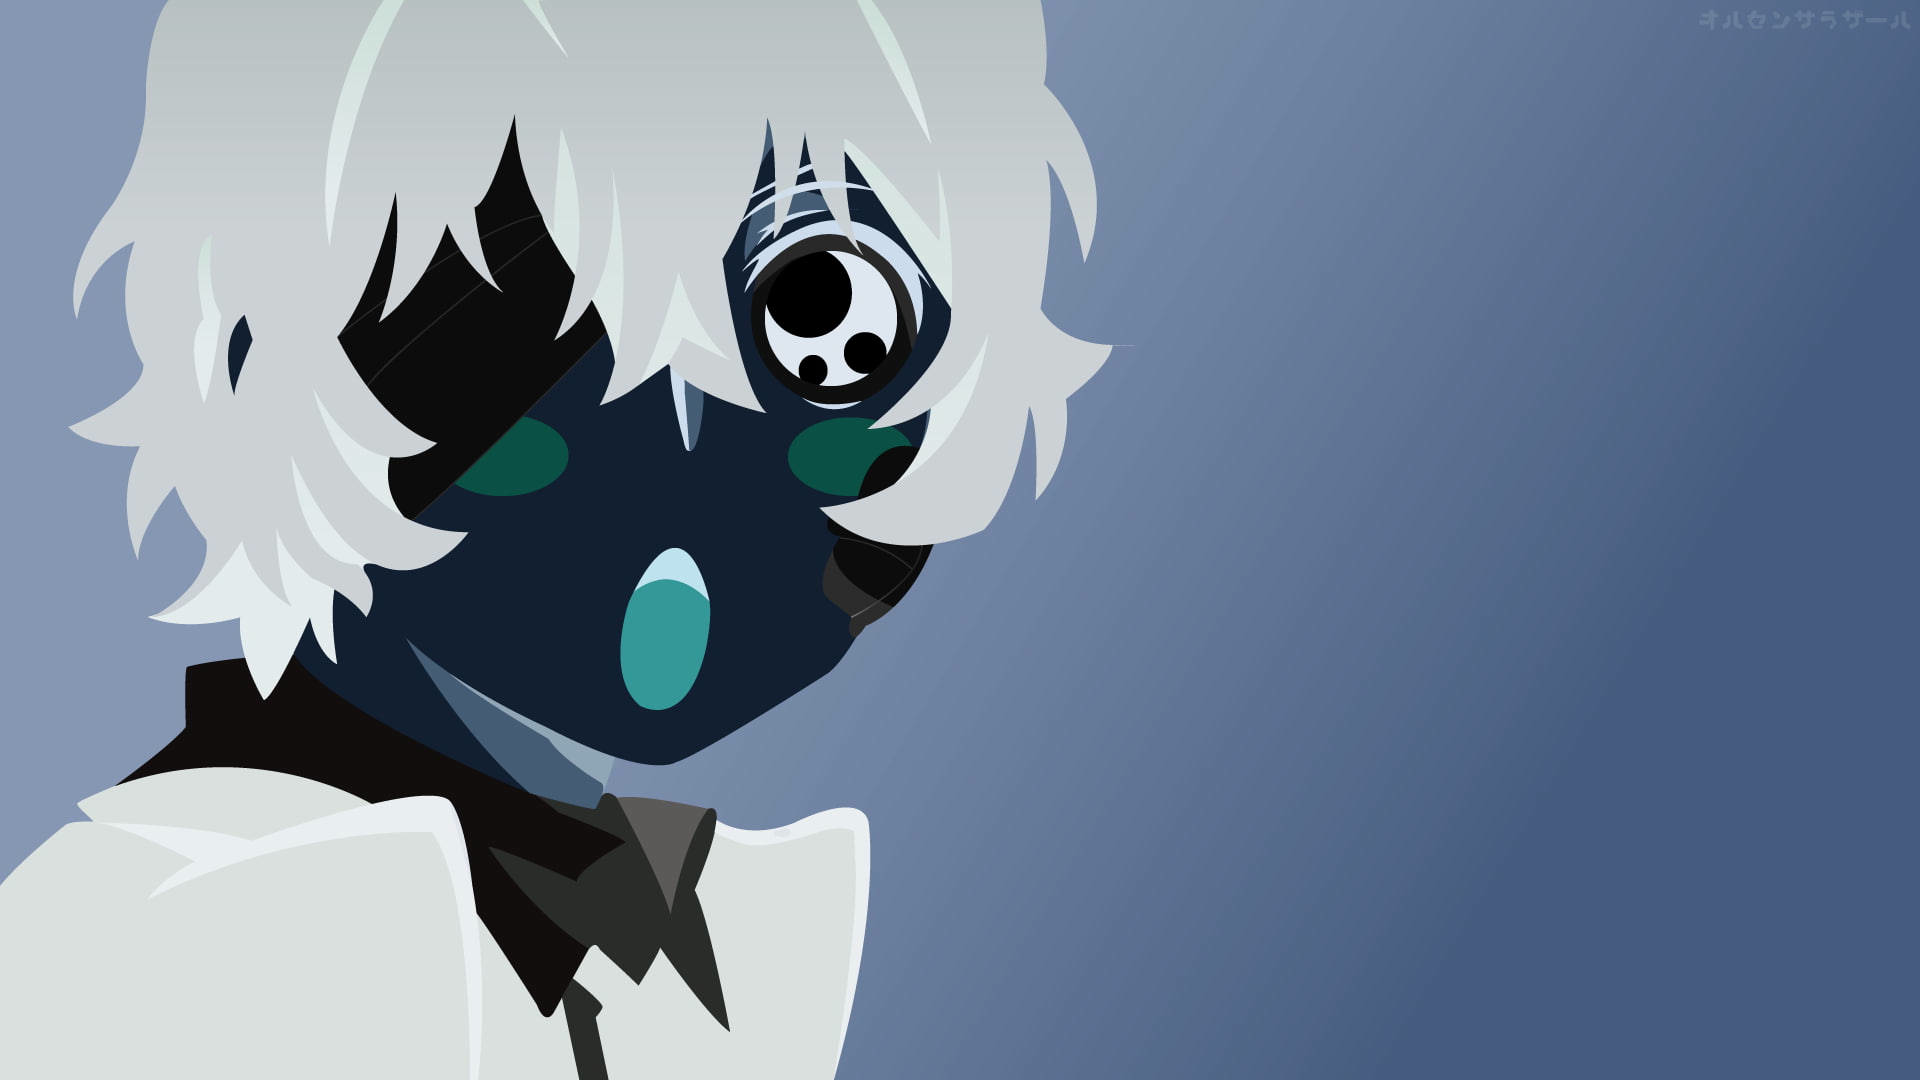

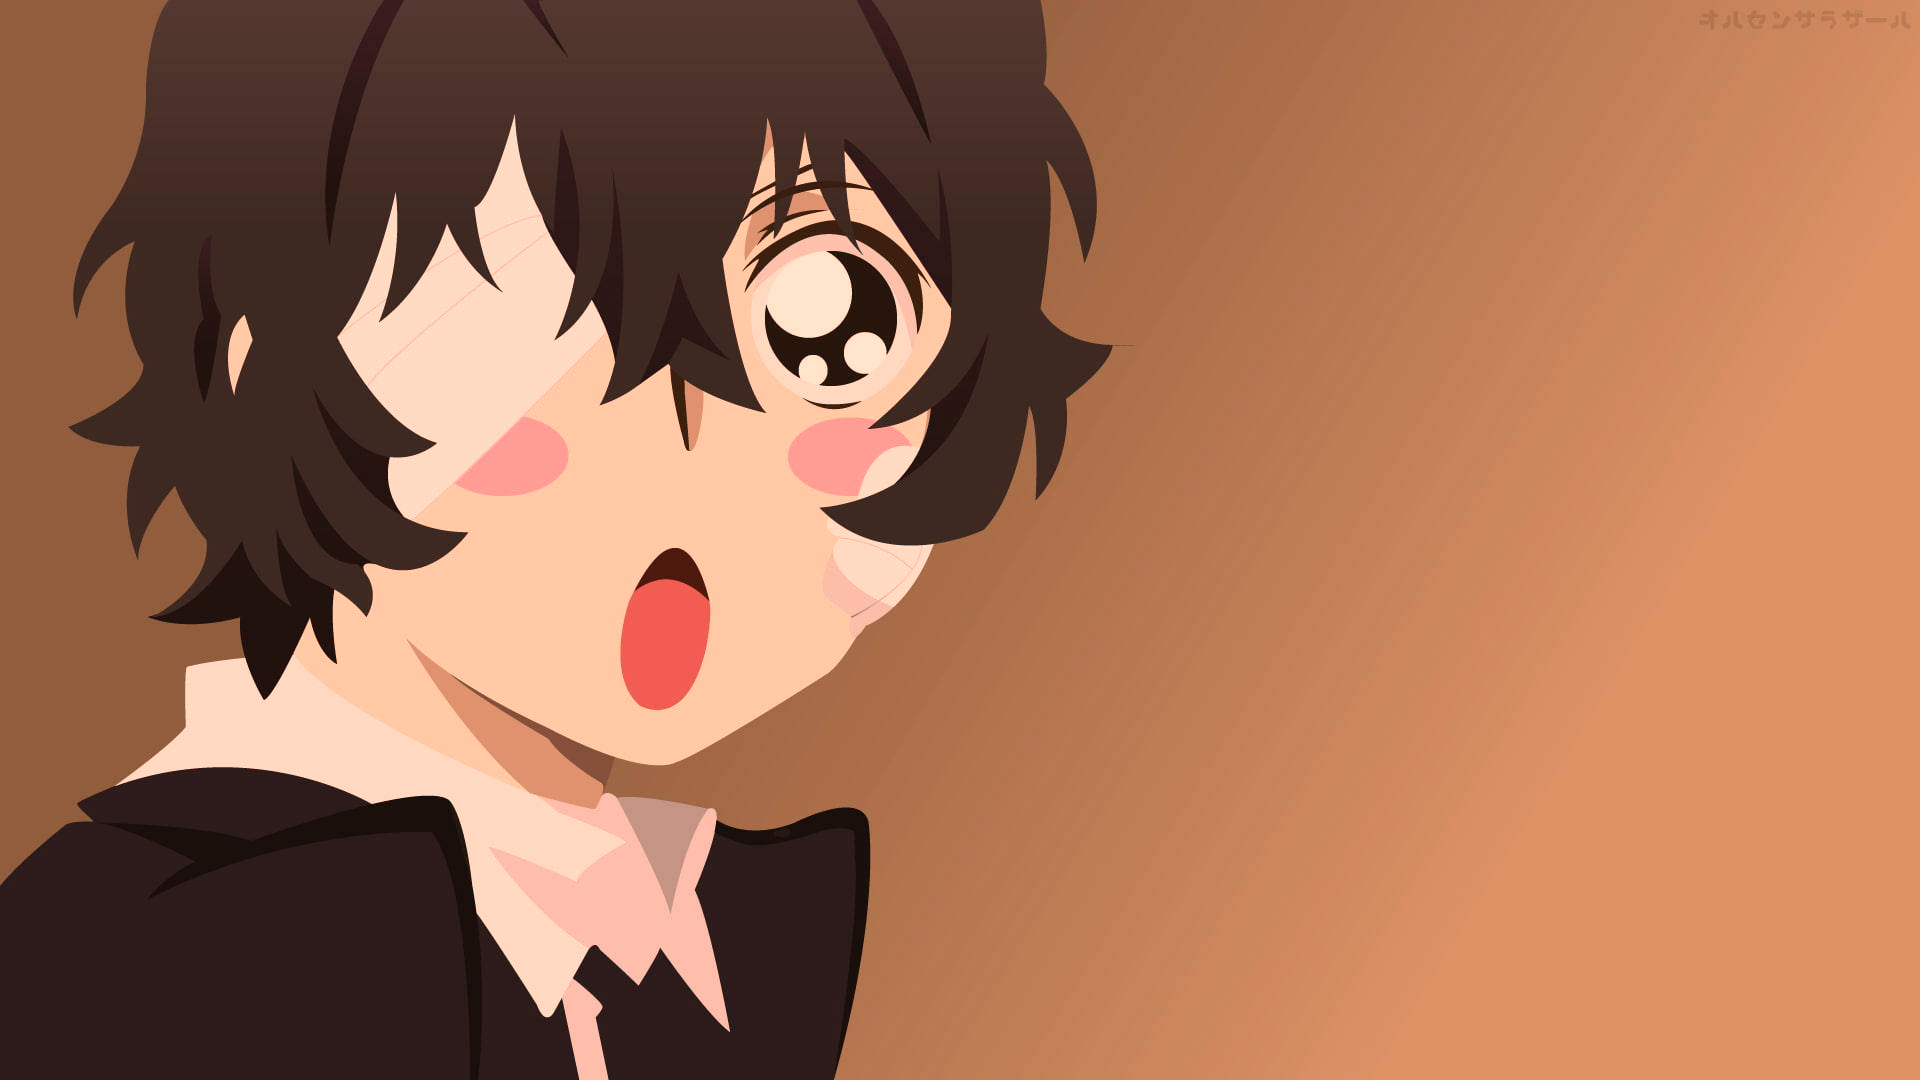

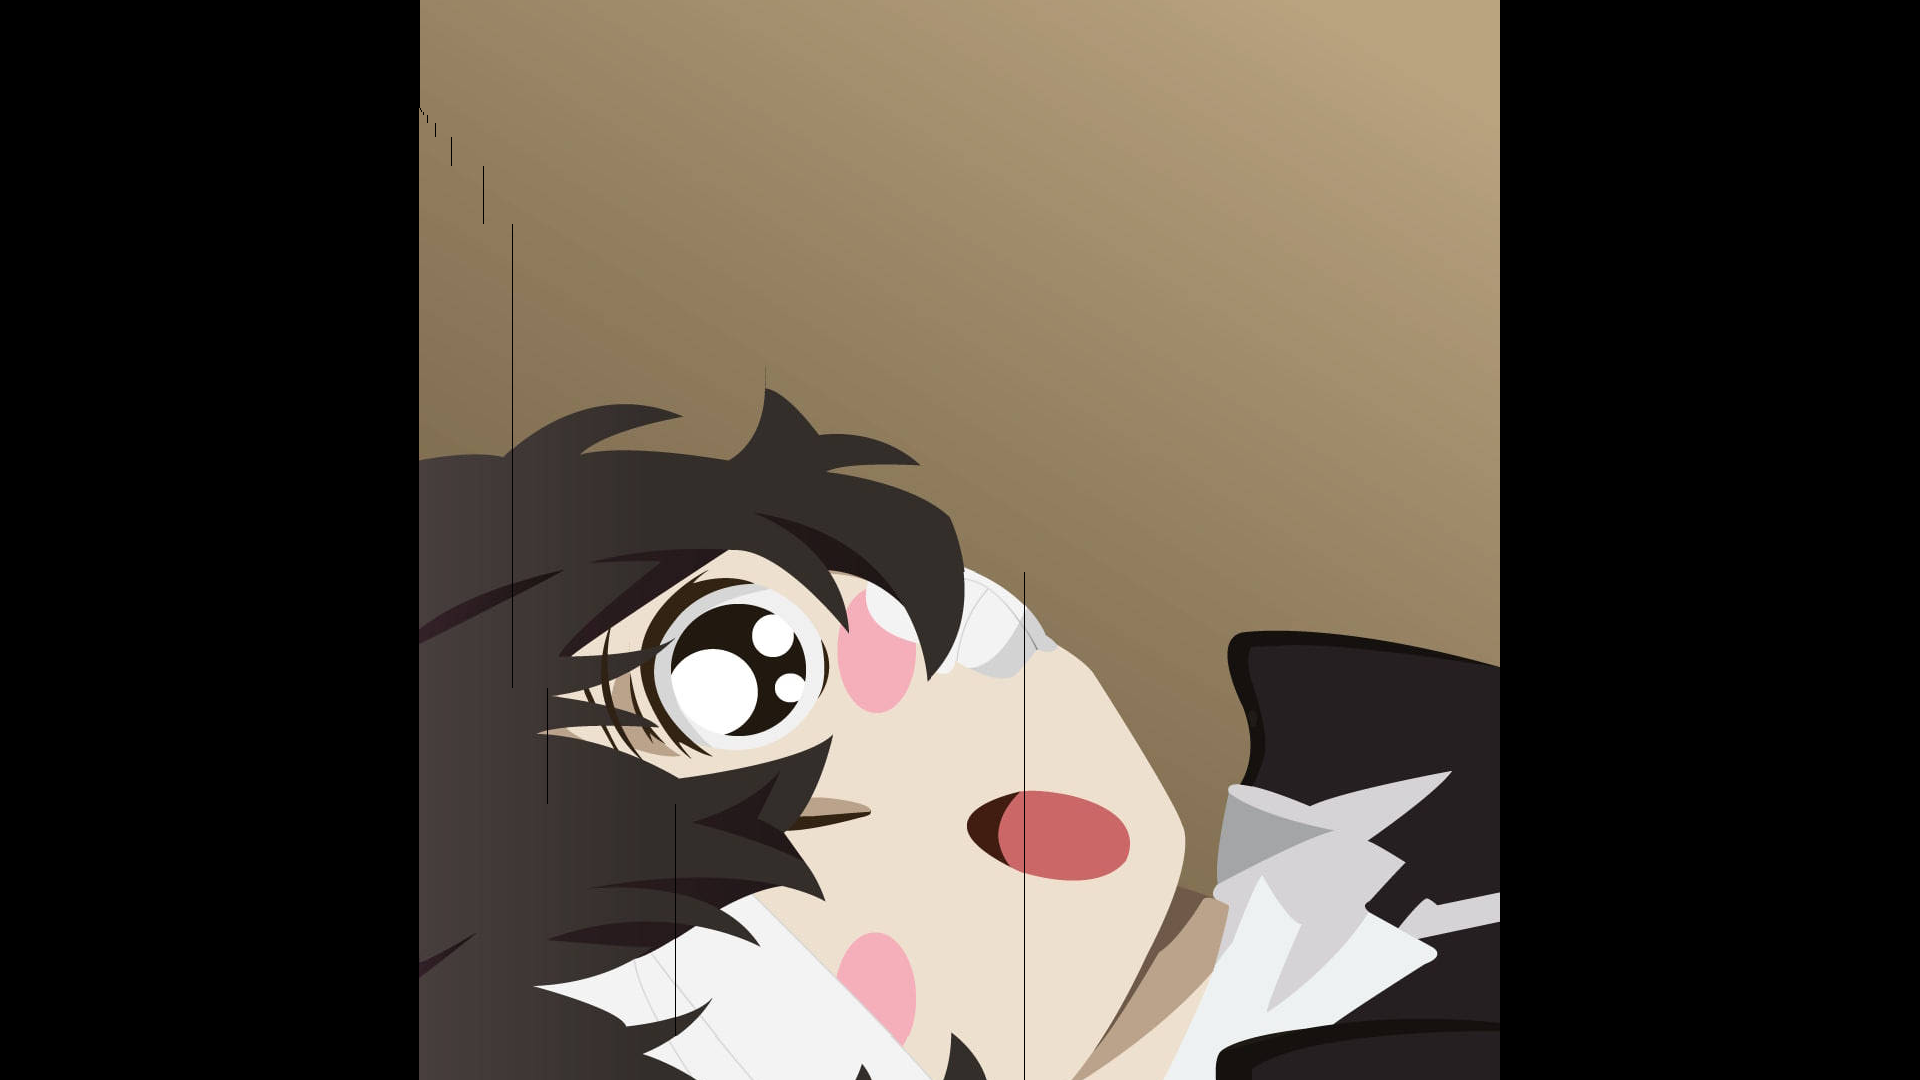

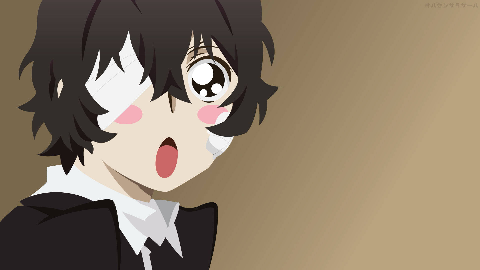

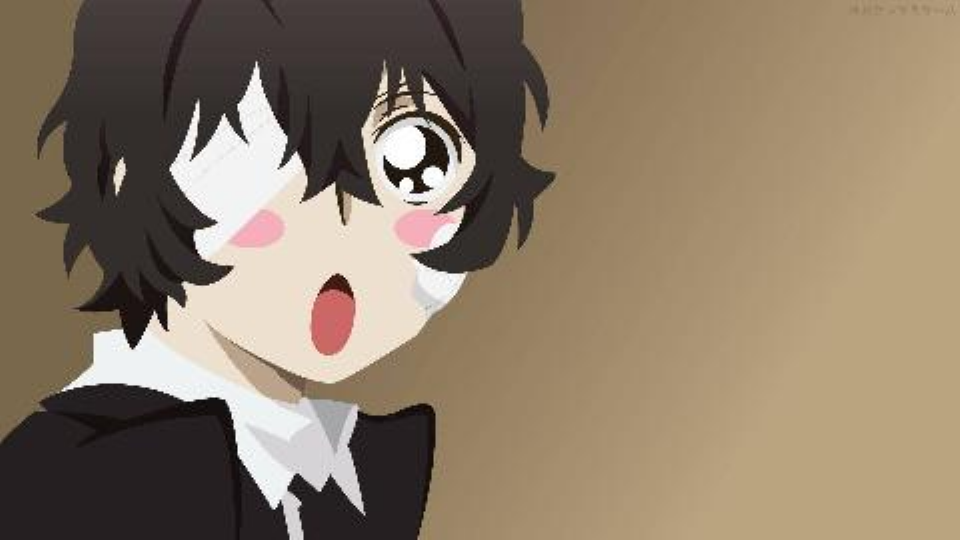

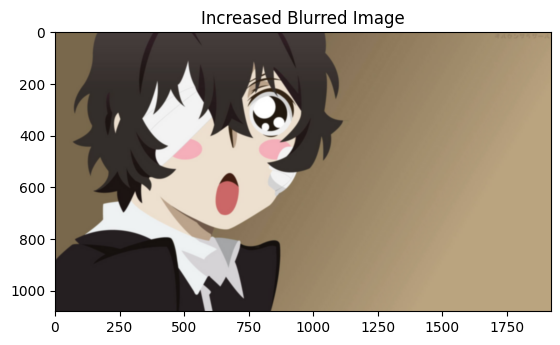

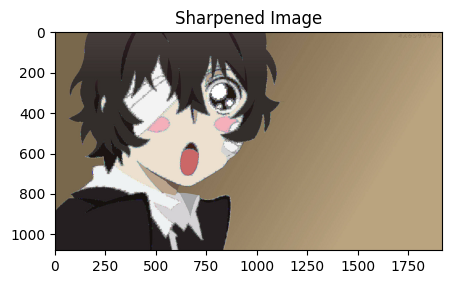

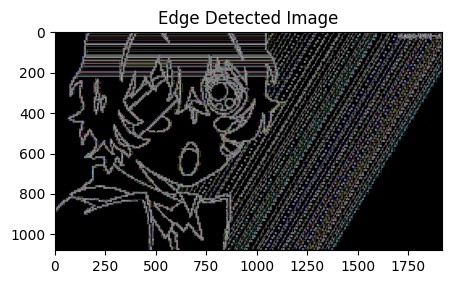

In [1]:
#Maryam Soleimani Shaldehi 401222075
from PIL import Image as PILImage
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image as PILImage
import numpy as np
import colorsys
from IPython.display import display
from scipy.signal import convolve2d

class eemage:

    def __init__(self, filename):
        self.filename = filename
        self.image = PILImage.open(filename)

    def show(self):
        self.image.show()

    @staticmethod
    def apply_grayscale(input_image_path, output_image_path):
        # Load the image and convert into a numpy array
        img = PILImage.open(input_image_path)
        image_data = np.asarray(img)
        print(image_data)

        # Calculate the grayscale values using the formula Y = 0.2989 * R + 0.5870 * G + 0.1140 * B
        grayscale_values = np.dot(image_data[..., :3], [0.2989, 0.5870, 0.1140])

        # Create a new NumPy array to hold the grayscale values
        grayscale_image_data = np.zeros_like(image_data[:, :, 0])

        # Assign the grayscale values to the new array
        grayscale_image_data[:, :] = grayscale_values

        # Convert the new NumPy array back to an image
        grayscale_image = PILImage.fromarray(np.uint8(grayscale_image_data))

        # Save the grayscale image
        grayscale_image.save(output_image_path)

        # Display the grayscale image
        grayscale_image.show()
        display(grayscale_image)

    @staticmethod
    def inverse_image_colors(input_image_path, output_image_path):

        img = PILImage.open(input_image_path)
        image_data = np.asarray(img)

        # Invert the color values by subtracting each channel from 255
        inverted_image_data = 255 - image_data

        inverted_image = PILImage.fromarray(np.uint8(inverted_image_data))

        # Save the inverted color image
        inverted_image.save(output_image_path)

        # Display the inverted color image
        inverted_image.show()
        display(inverted_image)

    
    @staticmethod
    def color_balance_adjustment(input_image_path, output_image_path, red_factor, green_factor, blue_factor):

        img = PILImage.open(input_image_path)
        image_data = np.asarray(img)

        # Apply the color balance adjustments using the provided factors for each channel
        balanced_image_data = image_data.astype(float)
        balanced_image_data[:, :, 0] *= red_factor
        balanced_image_data[:, :, 1] *= green_factor
        balanced_image_data[:, :, 2] *= blue_factor

        # Clip the values to ensure they remain within the valid range
        balanced_image_data = np.clip(balanced_image_data, 0, 255)

        balanced_image = PILImage.fromarray(np.uint8(balanced_image_data))

        # Save the balanced color image
        balanced_image.save(output_image_path)

        # Display the balanced color image
        balanced_image.show()
        display(balanced_image)


    @staticmethod
    def rotate_image(input_image_path, output_image_path, angle):

        img = PILImage.open(input_image_path)
        original_image_data = np.asarray(img)

        # Calculate the image center coordinates
        center_x = original_image_data.shape[1] / 2
        center_y = original_image_data.shape[0] / 2

        # Calculate the rotation matrix
        theta = np.radians(angle)
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        rotation_matrix = np.array([
            [cos_theta, -sin_theta, (1 - cos_theta) * center_x + sin_theta * center_y],
            [sin_theta, cos_theta, (1 - cos_theta) * center_y - sin_theta * center_x],
            [0, 0, 1]
        ])

        # Apply the rotation matrix to the image array using an affine transformation
        rows, cols = original_image_data.shape[:2]
        rotated_image_data = np.empty_like(original_image_data)
        for y in range(rows):
            for x in range(cols):
                new_coords = np.dot(rotation_matrix, [x, y, 1])
                new_x, new_y = new_coords[:-1]  # Extract the new x and y coordinates
                if 0 <= new_x < cols and 0 <= new_y < rows:
                    rotated_image_data[int(new_y), int(new_x)] = original_image_data[y, x]

        rotated_image = PILImage.fromarray(np.uint8(rotated_image_data))
        rotated_image.save(output_image_path)
        rotated_image.show() 
        display(rotated_image)  


    @staticmethod
    def downscale_image(input_image_path, output_image_path, scale_factor):

        img = PILImage.open(input_image_path)
        original_image_data = np.asarray(img)
    
        # Determine the new dimensions based on the scaling factor
        new_height = int(original_image_data.shape[0] * scale_factor)
        new_width = int(original_image_data.shape[1] * scale_factor)

        # Create a new blank array to hold the resized image
        downscaled_image_data = np.empty((new_height, new_width, original_image_data.shape[2]), dtype=original_image_data.dtype)

        # Calculate the scaling transformation for each coordinate
        for y in range(new_height):
            for x in range(new_width):
                # Calculate the corresponding coordinates in the original image
                original_x = x / scale_factor
                original_y = y / scale_factor

                # Perform bilinear interpolation to estimate pixel values from the original image
                x_floor, y_floor = int(np.floor(original_x)), int(np.floor(original_y))
                x_ceil, y_ceil = int(np.ceil(original_x)), int(np.ceil(original_y))

                # Calculate the fractional parts for interpolation
                x_frac, y_frac = original_x - x_floor, original_y - y_floor

                # Perform bilinear interpolation to estimate pixel values
                top = original_image_data[y_floor, x_floor] * (1 - x_frac) + original_image_data[y_floor, x_ceil] * x_frac
                bottom = original_image_data[y_ceil, x_floor] * (1 - x_frac) + original_image_data[y_ceil, x_ceil] * x_frac
                downscaled_image_data[y, x] = top * (1 - y_frac) + bottom * y_frac

        downscaled_image = PILImage.fromarray(np.uint8(downscaled_image_data))
        downscaled_image.save(output_image_path)
        downscaled_image.show()
        display(downscaled_image) 


    @staticmethod
    def upscale_image(input_image_path, output_image_path, scale_factor):

        img = PILImage.open(input_image_path)
        original_image_data = np.asarray(img)

        # Determine the new dimensions based on the scaling factor
        new_height = int(original_image_data.shape[0] * scale_factor)
        new_width = int(original_image_data.shape[1] * scale_factor)

        # Create a new blank array to hold the upscaled image
        upscaled_image_data = np.empty((new_height, new_width, original_image_data.shape[2]), dtype=original_image_data.dtype)

        # Calculate the scaling transformation for each coordinate
        for y in range(new_height):
            for x in range(new_width):
                # Calculate the corresponding coordinates in the original image through reverse mapping
                original_x = x / scale_factor
                original_y = y / scale_factor

                # Ensure the original coordinates stay within bounds
                original_x = max(0, min(original_x, original_image_data.shape[1] - 1))
                original_y = max(0, min(original_y, original_image_data.shape[0] - 1))

                # Perform bilinear interpolation to estimate pixel values from the original image
                x_floor, y_floor = int(np.floor(original_x)), int(np.floor(original_y))
                x_ceil, y_ceil = int(np.ceil(original_x)), int(np.ceil(original_y))
                x_frac, y_frac = original_x - x_floor, original_y - y_floor

                # Perform bilinear interpolation to estimate pixel values based on the adjusted original coordinates
                top_left = original_image_data[y_floor, x_floor]
                top_right = original_image_data[y_floor, x_ceil]
                bottom_left = original_image_data[y_ceil, x_floor]
                bottom_right = original_image_data[y_ceil, x_ceil]

                # Apply bilinear interpolation to estimate pixel values
                top = top_left * (1 - x_frac) + top_right * x_frac
                bottom = bottom_left * (1 - x_frac) + bottom_right * x_frac
                upscaled_image_data[y, x] = top * (1 - y_frac) + bottom * y_frac

        upscaled_image = PILImage.fromarray(np.uint8(upscaled_image_data))
        upscaled_image.save(output_image_path)
        upscaled_image.show() 
        display(upscaled_image)

    @staticmethod
    def blur_imgage(input_image_path):

        # Define the blur kernel for basic blurring
        blur_kernel = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16  # Normalized blur kernel

        # Original image data (replace this with your provided original image data)
        img = PILImage.open(input_image_path)
        image_data = np.asarray(img)

        # Function to perform iterative blurring
        def iterative_blur(image, iterations):
            
            # Apply blur operation iteratively
            blurred_image = image.copy()
            for _ in range(iterations):
                blurred_image = np.stack([convolve2d(blurred_image[..., i], blur_kernel, mode='same', boundary='symm', fillvalue=0) for i in range(blurred_image.shape[2])], axis=-1)
            return blurred_image.astype(np.uint8)

        # Apply iterative blurring for increased blurring effect
        iterations = 5  # The number of times the blur operation is applied
        increased_blurred_image = iterative_blur(image_data, iterations)

        # Display the increased blurred image for visualization
        plt.imshow(increased_blurred_image)
        plt.title('Increased Blurred Image')
        plt.show()

    
    @staticmethod
    def sharpen_imgage(input_image_path):

        sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

        img = PILImage.open(input_image_path)
        image_data = np.asarray(img)

        sharpened_channels = [convolve2d(image_data[..., i], sharpen_kernel, mode='same', boundary='symm', fillvalue=0) for i in range(image_data.shape[2])]

        sharpened_image = np.stack(sharpened_channels, axis=-1).astype(np.uint8)

        plt.figure(figsize=(5, 5))
        plt.imshow(sharpened_image)
        plt.title('Sharpened Image')
        plt.show()

    @staticmethod
    def edge_imgage(input_image_path):

        edge_detection_kernel = np.array([[-1, -1, -1],
                                  [-1, 8, -1],
                                  [-1, -1, -1]])

        img = PILImage.open(input_image_path)
        image_data = np.asarray(img)

        edge_detected_channels = [convolve2d(image_data[..., i], edge_detection_kernel, mode='same', boundary='symm', fillvalue=0) for i in range(image_data.shape[2])]

        edge_detected_image = np.stack(edge_detected_channels, axis=-1).astype(np.uint8)

        plt.figure(figsize=(5, 5))
        plt.imshow(edge_detected_image)
        plt.title('Edge Detected Image')
        plt.show()

        


image = eemage("dazai.jpg")  # Load the image
image.show()  # Display the image
img = PILImage.open("dazai.jpg")
display(img)

# Color Methods:
eemage.apply_grayscale('dazai.jpg', 'grayscale_dazai.jpg') 
eemage.inverse_image_colors('dazai.jpg', 'inverted_dazai.jpg')
eemage.color_balance_adjustment('dazai.jpg', 'balanced_dazai.jpg',1.2,0.9,0.8)

# Rotation:
eemage.rotate_image('dazai.jpg', 'rotated_dazai.jpg',-90)

# resize:
eemage.downscale_image('dazai.jpg', 'downscaled_dazai.jpg',0.25)
eemage.upscale_image('downscaled_dazai.jpg', 'upscaled_dazai.jpg',2)

# filter:
eemage.blur_imgage('dazai.jpg')
eemage.sharpen_imgage('dazai.jpg')
eemage.edge_imgage('dazai.jpg')






